## Tamil literacy study: data mangling

In [7]:
# some imports
import csv
import os
import numpy as np
import pandas as pd
from IPython.display import display
import pymc3 as pm
from model_graph_fixed import model_to_graphviz
from bambi import Model
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import analyze  # import some stuff I wrote to clean our data

# display plots inline
%matplotlib inline
sns.set_palette('Set2')
sns.set_context('talk')
sns.set_style('ticks')

## Raven's Standard Progressive Matrices

In [26]:
df = analyze.tsv_to_df('Ravens')
display(df.groupby('literate').mean()[['RT', 'ACC']])

,RT,ACC
literate,,
low,15.834457,0.198830
n,11.634784,0.122222
y,22.114918,0.331675


Those 

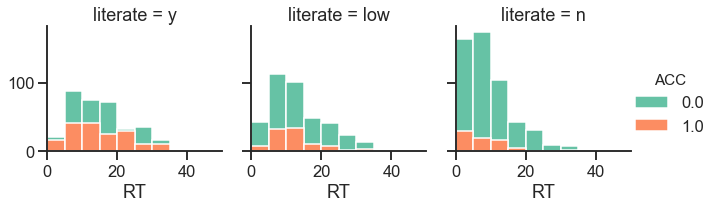

In [3]:
g = sns.FacetGrid(df, col='literate', hue='ACC')
g.map(sns.distplot, 'RT', bins=np.arange(0, 40, 5), kde=False, hist_kws={'alpha': 1})
g.set(xlim=(0, 50))
g.add_legend();

In [6]:
df = df[df['literate'] != 'low']  # toss out low literates for this initial model

model = Model(df)
results = model.fit('ACC ~ literate_binary * list_binary', random=['1|item', '1|pp'],
                    samples=5000, tune=1000, chains=3, cores=3, family='bernoulli')
pm_model = model.backend.model
trace = model.backend.trace
display(pm.summary(trace, varnames=['Intercept',
                                    'literate_binary',
                                    'list_binary',
                                    'literate_binary:list_binary'], transform=np.exp))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarnin

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept__0,0.081684,0.029897,0.000400,0.031688,0.140660,4343.082738,1.000011
literate_binary__0,3.674905,1.119769,0.011957,1.721761,5.859675,7798.261476,0.999958
list_binary__0,1.954177,0.977558,0.013424,0.494430,3.852555,4209.839065,0.999940
literate_binary:list_binary__0,1.480816,0.497265,0.004884,0.638853,2.459980,8675.663695,0.999922


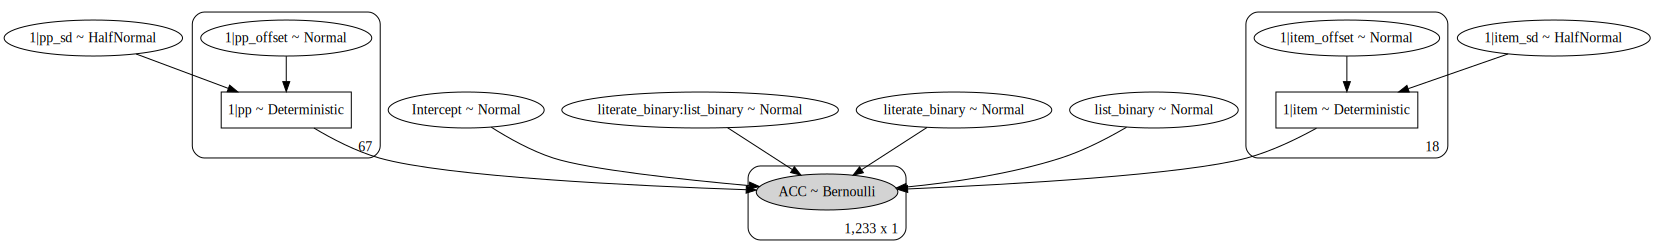

In [7]:
model_to_graphviz(pm_model)

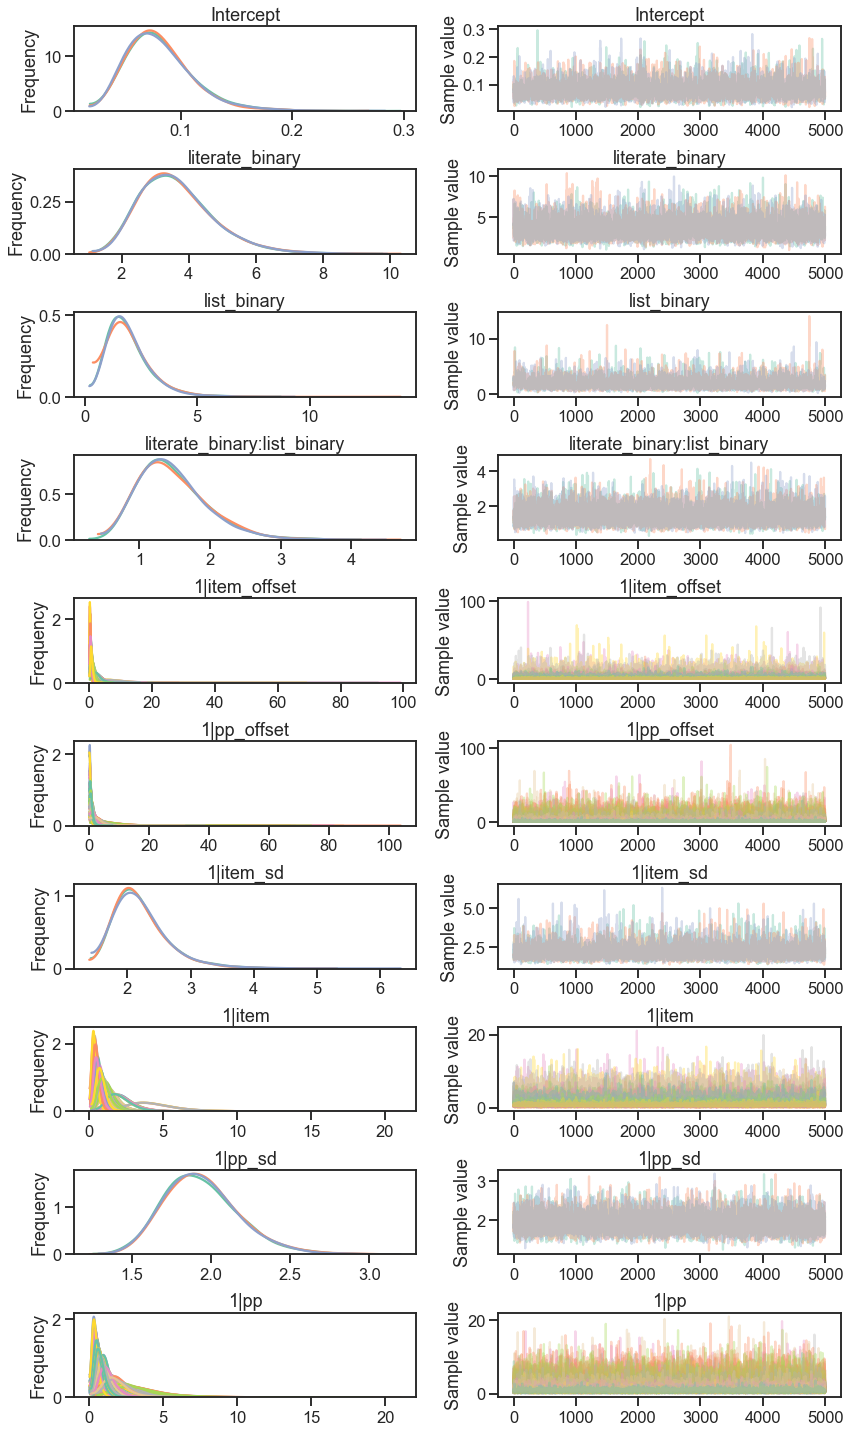

In [8]:
pm.traceplot(trace, transform=np.exp);

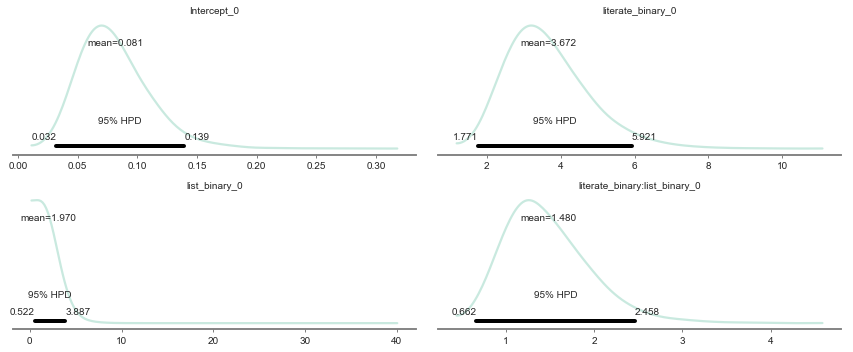

In [18]:
pm.plot_posterior(trace, kde_plot=True, varnames=['Intercept',
                                                  'literate_binary',
                                                  'list_binary',
                                                  'literate_binary:list_binary'], transform=np.exp);

## Cambridge Bike/Car/Face Recognition Task

In [6]:
df = analyze.tsv_to_df('Cambridge')
display(df.groupby(['category', 'literate']).mean()[['RT', 'ACC']])

RT       ACC
category literate                    
bikes    low       5.122729  0.567664
         n         5.311049  0.502286
         y         5.436221  0.593750
cars     low       4.792738  0.467949
         n         3.949976  0.376543
         y         5.484224  0.504630
faces    low       4.500647  0.500712
         n         4.428920  0.461841
         y         4.673816  0.522569

In [8]:
df = df[df['literate'] != 'low']  # toss out low literates for this initial model

# create dummies for cars and faces, bikes will be the default
df['cars'] = pd.get_dummies(df['category'])['cars']
df['faces'] = pd.get_dummies(df['category'])['faces']

model = Model(df)
results = model.fit('ACC ~ literate_binary + cars + faces + literate_binary:cars + literate_binary:faces',
                    random=['1|trialNo', '1|pp'], samples=5000, tune=1000, chains=3, cores=3, family='bernoulli')
pm_model = model.backend.model
trace = model.backend.trace
display(pm.summary(trace, varnames=['Intercept',
                                    'literate_binary',
                                    'cars',
                                    'faces',
                                    'literate_binary:cars',
                                    'literate_binary:faces'], transform=np.exp))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bambi/models.py:228: UserWarning: Modeling the probability that ACC=='1.0'
  self.y.name, str(self.clean_data[self.y.name].iloc[event])))
Auto-assigning NUTS sampler...
Initializing NUT

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept__0,1.032046,0.102492,0.001300,0.838801,1.239071,5839.610047,0.999919
literate_binary__0,1.510294,0.184059,0.002259,1.164515,1.877608,5970.157761,1.000172
cars__0,0.576374,0.041307,0.000396,0.497700,0.660059,10031.318132,1.000039
faces__0,0.834253,0.058405,0.000579,0.724469,0.951255,9869.635832,1.000082
literate_binary:cars__0,1.174986,0.117868,0.001039,0.948979,1.409090,10385.283081,0.999971
literate_binary:faces__0,0.876726,0.087085,0.000841,0.714147,1.050150,10112.266417,0.999946


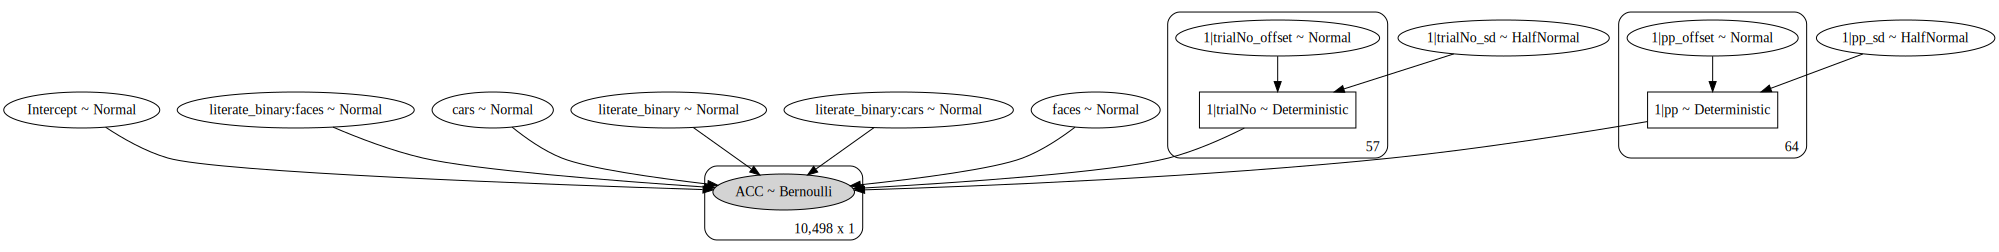

In [9]:
model_to_graphviz(pm_model)

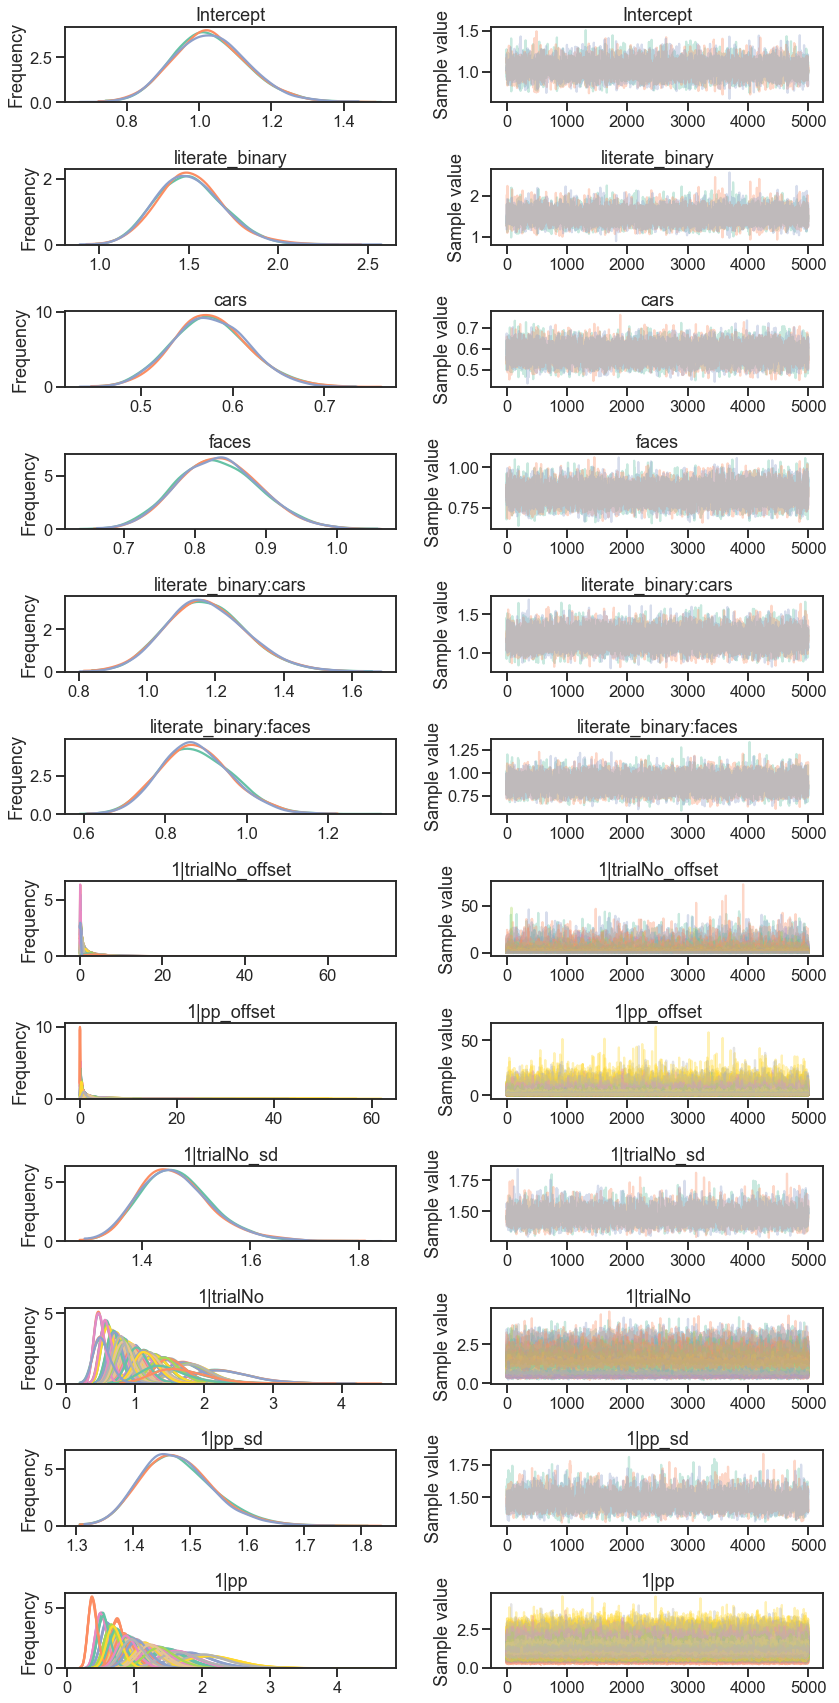

In [10]:
pm.traceplot(trace, transform=np.exp);

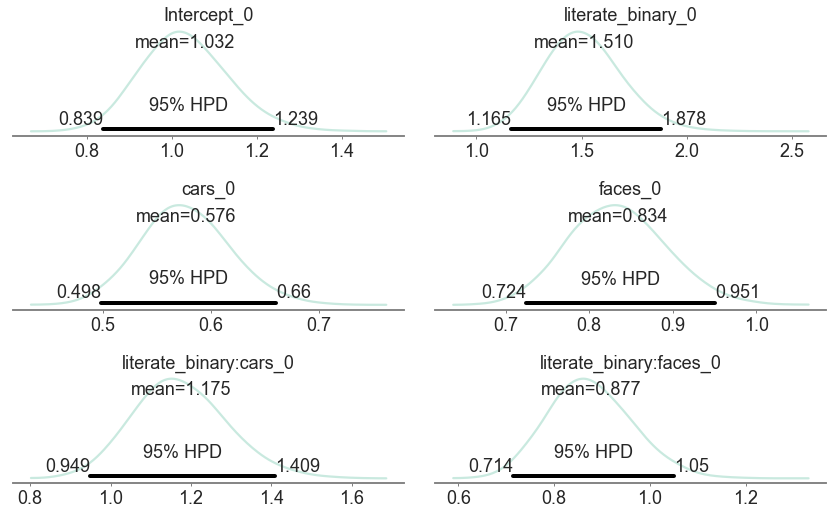

In [11]:
pm.plot_posterior(trace, kde_plot=True, varnames=['Intercept',
                                                  'literate_binary',
                                                  'cars',
                                                  'faces',
                                                  'literate_binary:cars',
                                                  'literate_binary:faces'], transform=np.exp);

## Illusions

In [19]:
df = analyze.tsv_to_df('Illusions')
display(df.groupby(['Condition', 'literate']).mean()[['RT', 'ACC']])

RT       ACC
Condition literate                    
control   low       6.575128  0.756806
          n         6.509537  0.664087
          y         6.680003  0.809211
illusion  low       7.767858  0.441645
          n         7.911319  0.450226
          y         8.274633  0.397837

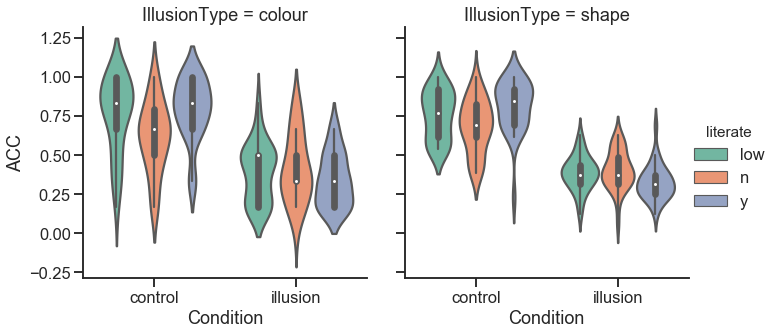

In [22]:
df = df[df['IllusionType'] != 'ambiguous']
g = sns.catplot(hue='literate', y='ACC', x='Condition', col='IllusionType', kind='violin',
                data=df.groupby(['pp', 'literate', 'Condition', 'IllusionType'], as_index=False).mean());

In [15]:
df = df[df['literate'] != 'low']
df = df[df['IllusionType'] != 'ambiguous']
df['control'] = pd.get_dummies(df['Condition'])['control']
df['colour'] = pd.get_dummies(df['IllusionType'])['colour']

model = Model(df)
results = model.fit('ACC ~ literate_binary + control + colour + literate_binary:control + literate_binary:colour + control:colour',
                    random=['1|Trialnumber', '1|pp'], samples=5000, tune=1000, chains=3, cores=3, family='bernoulli')
pm_model = model.backend.model
trace = model.backend.trace
display(pm.summary(trace, varnames=['Intercept',
                                    'literate_binary',
                                    'control',
                                    'colour',
                                    'literate_binary:control',
                                    'literate_binary:colour',
                                    'control:colour'], transform=np.exp))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bambi/models.py:228: UserWarning: Modeling the probability that ACC=='1.0'
  self.y.name, str(self.clean_data[self.y.name].iloc[event])))
Auto-assigning NUTS sampler...
Initializing NUT

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept__0,0.635148,0.167040,0.002527,0.329284,0.964753,4459.537968,0.999976
literate_binary__0,0.689798,0.102347,0.000913,0.499507,0.895373,12480.269533,0.999971
control__0,4.270246,1.676053,0.021885,1.486029,7.508588,4512.049978,0.999904
colour__0,1.258113,0.649595,0.009616,0.301688,2.530997,4625.072615,1.000026
literate_binary:control__0,3.442842,0.637550,0.004396,2.221063,4.662843,16558.041013,1.000088
literate_binary:colour__0,1.048452,0.212225,0.001728,0.670583,1.474531,16780.836922,1.000047
control:colour__0,0.810374,0.617507,0.008737,0.085640,1.998690,4514.790014,1.000296


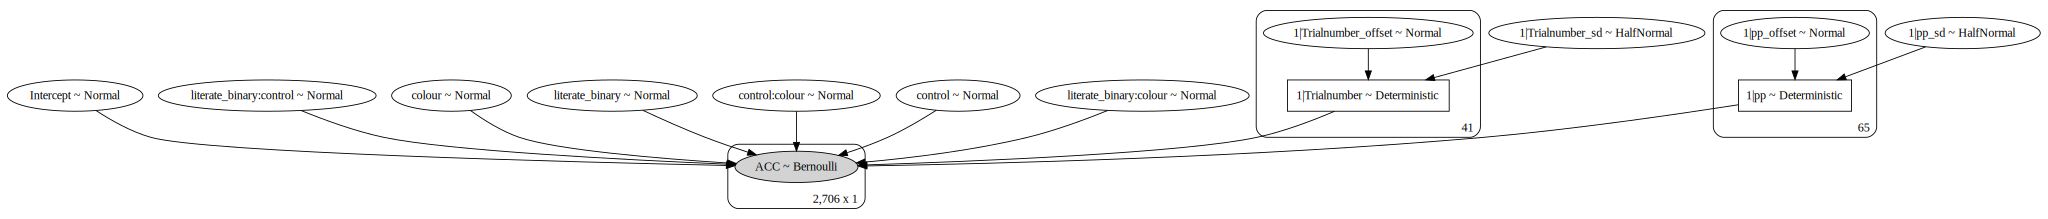

In [16]:
model_to_graphviz(pm_model)

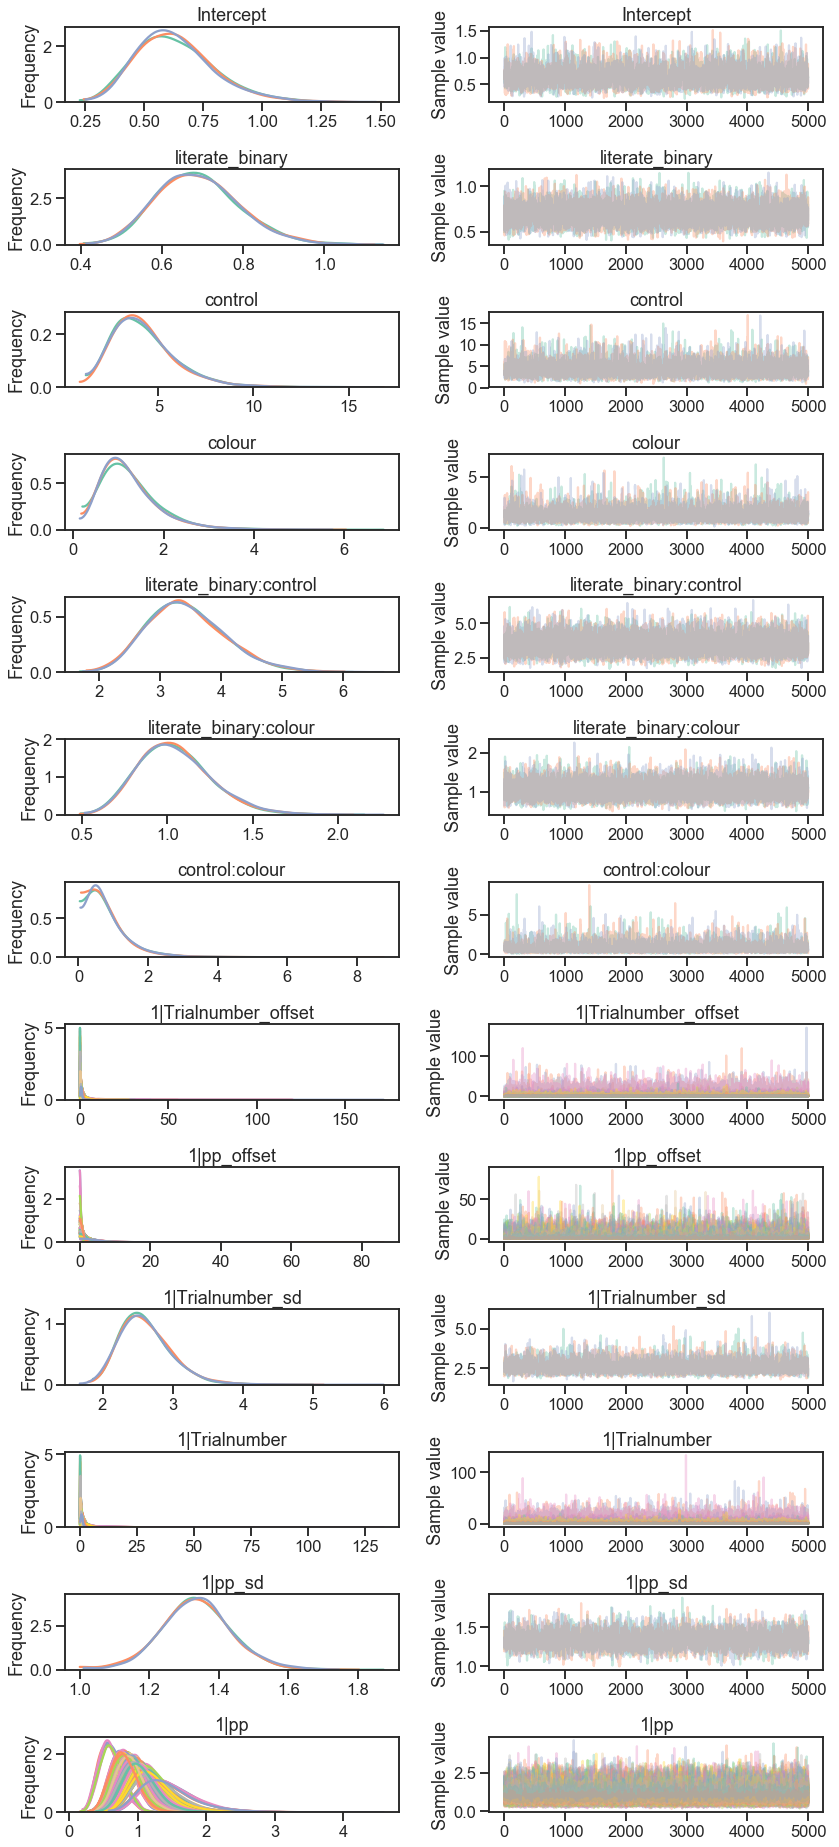

In [17]:
pm.traceplot(trace, transform=np.exp);

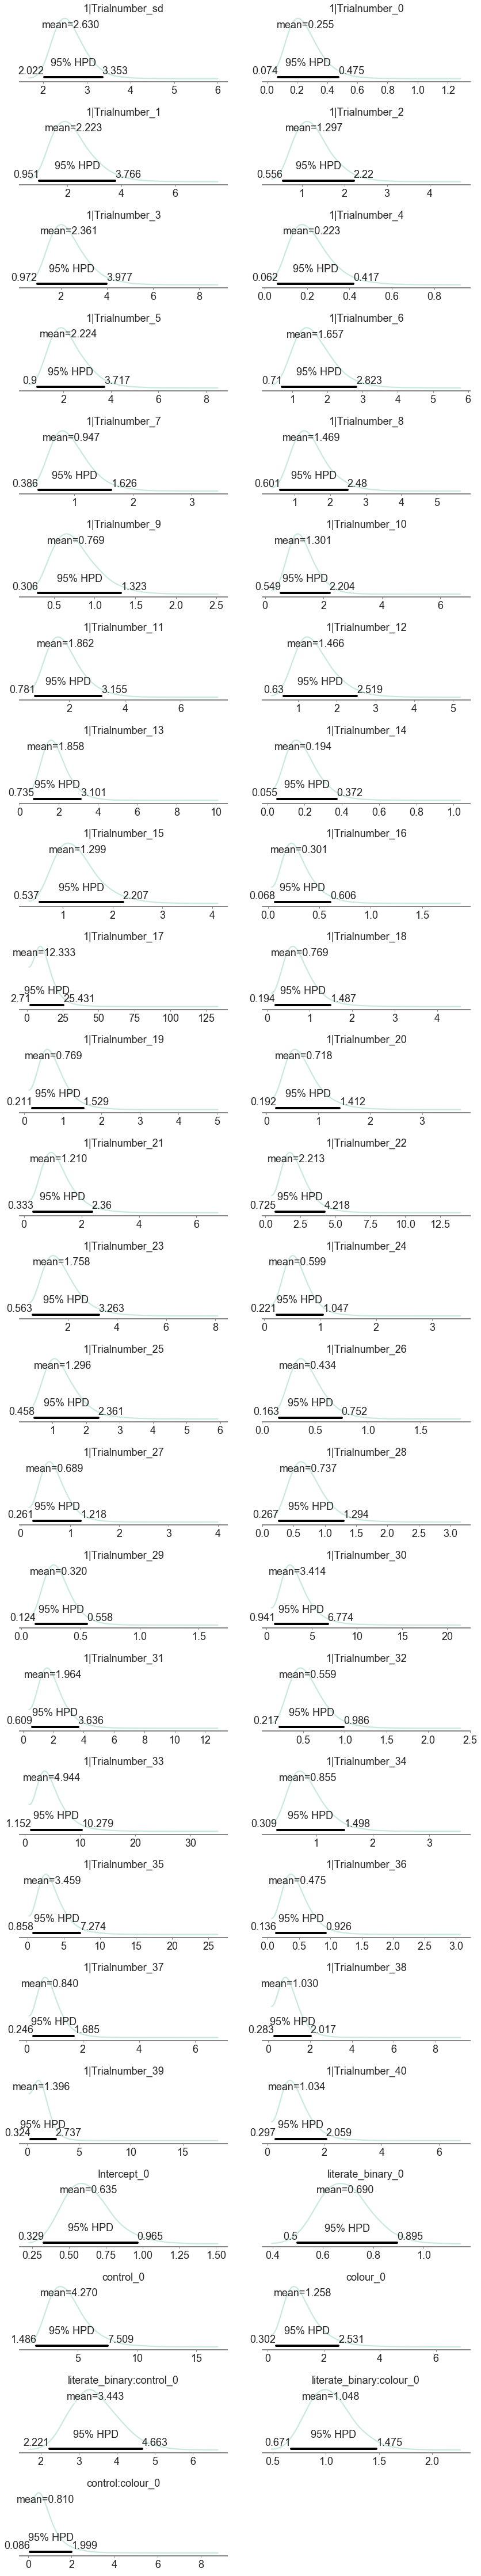

In [25]:
pm.plot_posterior(trace, kde_plot=True, varnames=['1|Trialnumber_sd',
                                                  '1|Trialnumber',
                                                  'Intercept',
                                                  'literate_binary',
                                                  'control',
                                                  'colour',
                                                  'literate_binary:control',
                                                  'literate_binary:colour',
                                                  'control:colour'], transform=np.exp);